In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

data = pd.read_csv('facebook_train.csv')

In [12]:
print(data)

     total_followers    type  category  month  weekday  hour  paid  comment  \
0             124050   Photo         3      6        4    17     1        3   
1             132556   Photo         2      8        3    24     0       11   
2              92786   Photo         2      2        6    17     1        2   
3             135632   Photo         1      9        2     1     0        2   
4             139540    Link         1     12        3    17     1        7   
5             138969   Photo         3     12        5    17     1        3   
6             124025   Photo         3      6        3    18     0       10   
7             131431  Status         2      7        6    20     1        7   
8             137820   Photo         1     11        7    16     1       21   
9             137553  Status         2     11        4    17     0        2   
10            136532   Photo         1     11        4     2     0        2   
11            115484   Photo         1      4       

In [13]:
train_data = []
length = len(data.type)

for i in range(length):
    initial = []
    initial.append(data.total_followers[i])
    type_ = data.type[i]
    if type_ == 'Photo':
        initial.append(0)
    elif type == 'Link':
        initial.append(1)
    else:
        initial.append(2)
    initial.append(data.category[i])
    initial.append(data.month[i])
    initial.append(data.weekday[i])
    initial.append(data.paid[i])
    train_data.append(initial)

In [14]:
target_data_comment = np.array(data.comment).reshape(-1,1)
target_data_like = np.array(data.like).reshape(-1,1)
target_data_share = np.array(data.share).reshape(-1,1)

In [15]:
from sklearn import linear_model
reg_comment = linear_model.LinearRegression()
reg_like = linear_model.LinearRegression()
reg_share = linear_model.LinearRegression()

reg_comment.fit(train_data,target_data_comment)
reg_like.fit(train_data,target_data_like)
reg_share.fit(train_data,target_data_share)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
comment_prediction = reg_comment.predict(train_data)
like_prediction = reg_like.predict(train_data)
share_prediction = reg_share.predict(train_data)

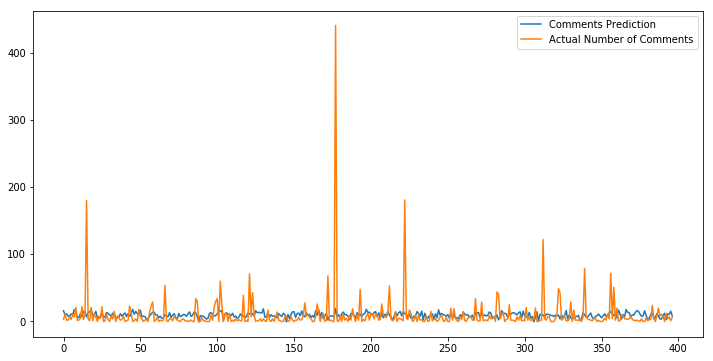

[[ 4.45904824e-04 -3.63258851e-01  4.28548811e-01 -2.03218153e+00
   8.41036233e-01  4.51085537e+00]]


In [24]:
plt.figure(figsize =(12,6))
plt.plot(range(length),comment_prediction,label='Comments Prediction')
plt.plot(range(length),data.comment,label='Actual Number of Comments')
plt.legend()
plt.show()
print(reg_comment.coef_)

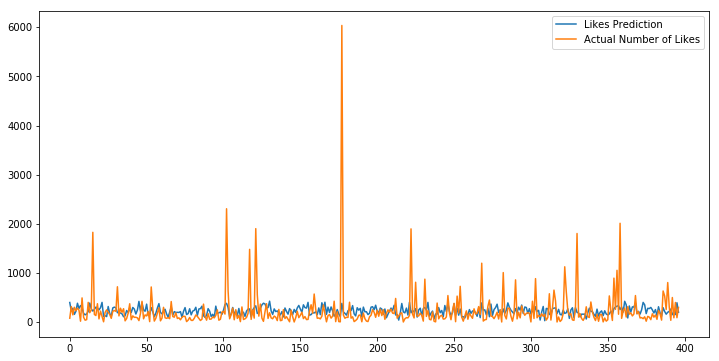

[[ 4.11884015e-03 -1.69304287e+01  5.92393213e+01 -1.39893664e+01
   7.42381125e+00  1.13645994e+02]]


In [25]:
plt.figure(figsize =(12,6))
plt.plot(range(length),like_prediction,label='Likes Prediction')
plt.plot(range(length),data.like,label='Actual Number of Likes')
plt.legend()
plt.show()
print(reg_like.coef_)

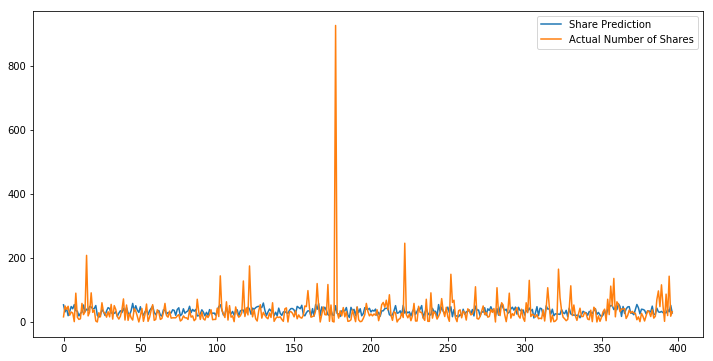

[[ 4.65567361e-04  2.62432452e+00  9.19336161e+00 -2.31028691e+00
   1.72708136e+00  1.04473303e+01]]


In [26]:
plt.figure(figsize =(12,6))
plt.plot(range(length),share_prediction,label='Share Prediction')
plt.plot(range(length),data.share,label='Actual Number of Shares')
plt.legend()
plt.show()
print(reg_share.coef_)

# Question 2

In [83]:
casualty_data = pd.read_csv('casualty_train.csv')
print(casualty_data)

       casualty_class  gender      age  severe pedestrian_location  \
0           passenger  female       33   False                 NaN   
1           passenger  female       20   False                 NaN   
2           passenger    male       52   False                 NaN   
3           passenger  female       17   False                 NaN   
4           passenger  female       20   False                 NaN   
5          pedestrian  female       40    True             In road   
6           passenger  female       40   False                 NaN   
7           passenger  female       23   False                 NaN   
8              driver  female       45   False                 NaN   
9          pedestrian    male        8   False   Close to Crossing   
10             driver  female        8   False                 NaN   
11          passenger  female        7   False                 NaN   
12             driver    male       33   False                 NaN   
13             drive

In [84]:
age = casualty_data.age
year = casualty_data.year
indexes = []
for i in range(len(age)):
    if age[i] == 'Unknown':
        indexes.append(i)

for i in range(len(age)):
    if year[i] == 'Unknown':
        indexes.append(i)

casualty_data.drop(indexes)

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010
5,pedestrian,female,40,True,In road,In Rd Not Crossing,bicycle,2008
6,passenger,female,40,False,NaN,NaN,motorbike,2005
7,passenger,female,23,False,NaN,NaN,taxi,2007
8,driver,female,45,False,NaN,NaN,car,2006
9,pedestrian,male,8,False,Close to Crossing,Drivers N/Side,bicycle,2010


In [85]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1.fit(casualty_data.casualty_class)
casualty_class = le1.transform(casualty_data.casualty_class)

In [86]:
le2 = LabelEncoder()
le2.fit(casualty_data.gender)
gender = le2.transform(casualty_data.gender)

le5 = LabelEncoder()
le5.fit(casualty_data.travel)
travel = le5.transform(casualty_data.travel)

le6 = LabelEncoder()
le6.fit(casualty_data.severe)
severe = le6.transform(casualty_data.severe)

In [87]:
train1 = []

for i in range(len(gender)):
    initial = []
    initial.append(casualty_class[i])
    initial.append(gender[i])
    initial.append(casualty_data.age[i])
    initial.append(travel[i])
    initial.append(casualty_data.year[i])
    train1.append(initial)

In [88]:
target1 = np.array(severe).reshape(-1,1)

In [89]:
reg = linear_model.LinearRegression()
reg.fit(train1,target1)
prediction = reg.predict(train1)

ValueError: could not convert string to float: 'Unknown'